# Вступление

Метод линейной регрессии используется для проверки гипотезы наличия линейной связи между двумя или несколькими переменными. Часто при первых использованиях не придаётся достаточной значимости тому, что 

*   оценивается именно линейная связь, а не другая. 
*   выбросы сильно влияют на результат оценивания


Рассмотрим к чему это может приводить. 

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

## Пример использования регрессии №1

В данном соврешенно корректном примере мы рассмотрим как работает регрессия, если всё хорошо. 

In [ ]:
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([5, 20, 14, 32, 22, 38])

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
model.score(x, y)

0.7158756137479542

In [ ]:
y_pred = model.intercept_ + model.coef_ * x

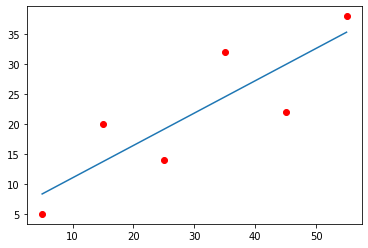

In [ ]:
plt.plot(x,y,'or',x, y_pred)

## Пример использования регрессии №2

В данном примере рассмотрим то, как линейная регрессия не повзоляет установить наличие квадратичной связи между переменными. 

In [ ]:
x = np.array([-1, 1, 0]).reshape((-1, 1))
y = np.array([0, 0, 1])

In [ ]:
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = model.intercept_ + model.coef_ * x

In [ ]:
model.score(x, y)

0.0

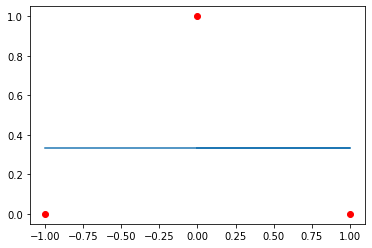

In [ ]:
plt.plot(x,y,'or',x, y_pred)

In [ ]:
x = np.arange(-1, 1, 0.0001)
y = (1-x**2)**(1/2)

In [ ]:
model.fit(x.reshape((-1, 1)), y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = model.intercept_ + model.coef_ * x

In [ ]:
model.score(x.reshape((-1, 1)), y)

9.283949073624065e-06

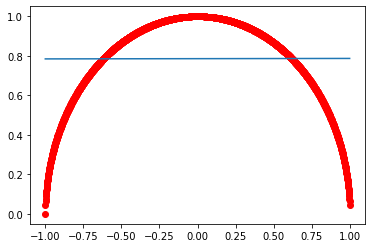

In [ ]:
plt.plot(x,y,'or',x, y_pred)

## Пример №3

В данном примере рассмотри то, как влияют выбросы на оценку качества зависимости. 

In [ ]:
x = np.array([0, 0, 0, 0, 0, 0, 0, 100]).reshape((-1, 1))
y = np.array([0, 1, 2, 3, 4, 5, 6, 100])

In [ ]:
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Обратие внимание, значение коэффициента регрессии - практически едиинца. 

In [ ]:
model.score(x, y)

0.9966105285457049

In [ ]:
y_pred = model.intercept_ + model.coef_ * x

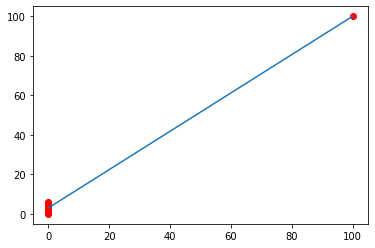

In [ ]:
plt.plot(x,y,'or',x, y_pred)

# Выводы
При использовании регрессионного анализа необходимо всегда использовать методы визуализации данных, чтобы "глазами" оценить качество построенной регрессионной модели. Нельзя полагаться только на математические оценки. Иногда можно увидеть, что зависимость есть, когда регрессия говорит, что её нет. Иногда можно увидеть, что построенная зависимость соверешнно некорректна, не смотря на то, что коэффициент регрессии близок к максимальному. 